In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
IEEE57models = pd.read_excel("Raw_Results/RESULTS_IEEE57_MainModels_100Epochs.xlsx")

IEEE57models.head()

,Unnamed: 0,Sparsity,Model 1 Accuracy,Model 7 Accuracy,Model 1 F1,Model 7 F1,Model 1 Precision,Model 7 Precision,Model 1 Recall,Model 7 Recall,Model 1 False Positive Rate,Model 7 False Positive Rate
0,0,0.1,0.5400,0.6880,0.149723,0.548480,0.987805,0.992147,0.081,0.379,0.001,0.003
1,1,0.2,0.6395,0.8935,0.436278,0.880939,1.000000,0.998733,0.279,0.788,0.000,0.001
2,2,0.3,0.8100,0.9760,0.765432,0.975460,1.000000,0.997908,0.620,0.954,0.000,0.002
3,3,0.4,0.9035,0.9950,0.893429,0.994985,0.997534,0.997988,0.809,0.992,0.002,0.002
4,4,0.5,0.9680,0.9975,0.966976,0.997501,0.998934,0.997003,0.937,0.998,0.001,0.003


In [3]:
IEEE57dct = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest.xlsx", sheet_name = "DCT")
IEEE57gnb = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest.xlsx", sheet_name = "GNB")
IEEE57knn = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest.xlsx", sheet_name = "KNN")

In [4]:
sparsity = IEEE57models['Sparsity']
model1_accuracy = IEEE57models['Model 1 Accuracy']
model7_accuracy = IEEE57models['Model 7 Accuracy']
model1_f1 = IEEE57models['Model 1 F1']
model7_f1 = IEEE57models['Model 7 F1']
model1_precision = IEEE57models['Model 1 Precision']
model7_precision = IEEE57models['Model 7 Precision']
model1_recall = IEEE57models['Model 1 Recall']
model1_recall = IEEE57models['Model 7 Recall']

In [5]:
dct_accuracy = IEEE57dct['Accuracy']
dct_f1 = IEEE57dct['F1 score']
dct_precision = IEEE57dct['Precision']
dct_recall = IEEE57dct['Recall']

gnb_accuracy = IEEE57gnb['Accuracy']
gnb_f1 = IEEE57gnb['F1 score']
gnb_precision = IEEE57gnb['Precision']
gnb_recall = IEEE57gnb['Recall']

knn_accuracy = IEEE57knn['Accuracy']
knn_f1 = IEEE57knn['F1 score']
knn_precision = IEEE57knn['Precision']
knn_recall = IEEE57knn['Recall']

In [6]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

## Accuracy Plot

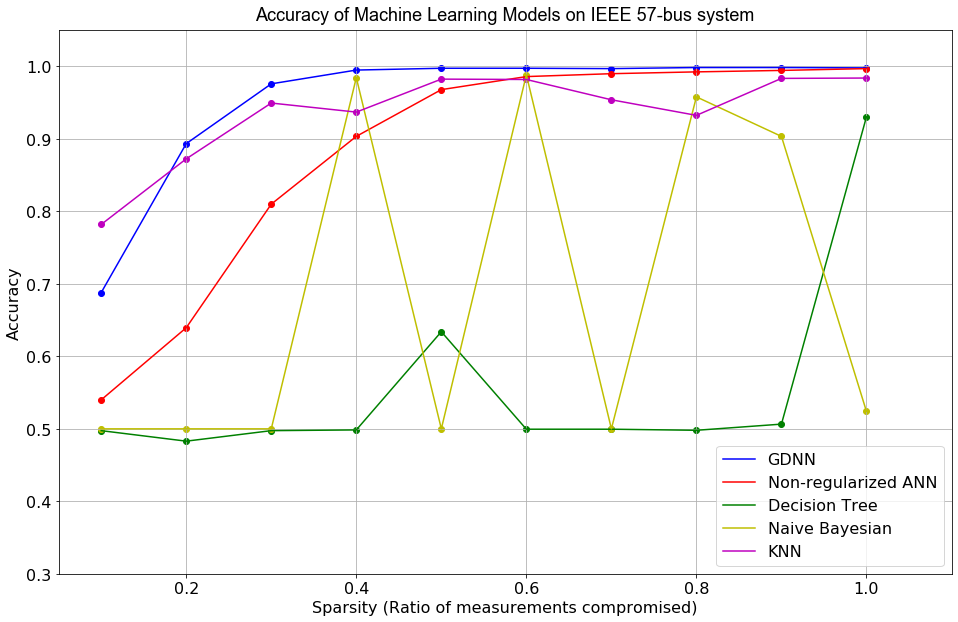

In [7]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_accuracy, color = 'b')
plt.plot(sparsity,model7_accuracy, 'b-', label="GDNN")

plt.scatter(sparsity,model1_accuracy, color = 'r')
plt.plot(sparsity,model1_accuracy, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_accuracy, color = 'g')
plt.plot(sparsity,dct_accuracy, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_accuracy, color = 'y')
plt.plot(sparsity,gnb_accuracy, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_accuracy, color = 'm')
plt.plot(sparsity,knn_accuracy, 'm-', label="KNN")
plt.ylabel('Accuracy')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('Accuracy of Machine Learning Models on IEEE 57-bus system', **title_font)
plt.axis([0.05,1.1,0.3,1.05])
plt.grid()

plt.savefig('IEEE57_accuracies.png')
plt.show()

## F1 Score Plot

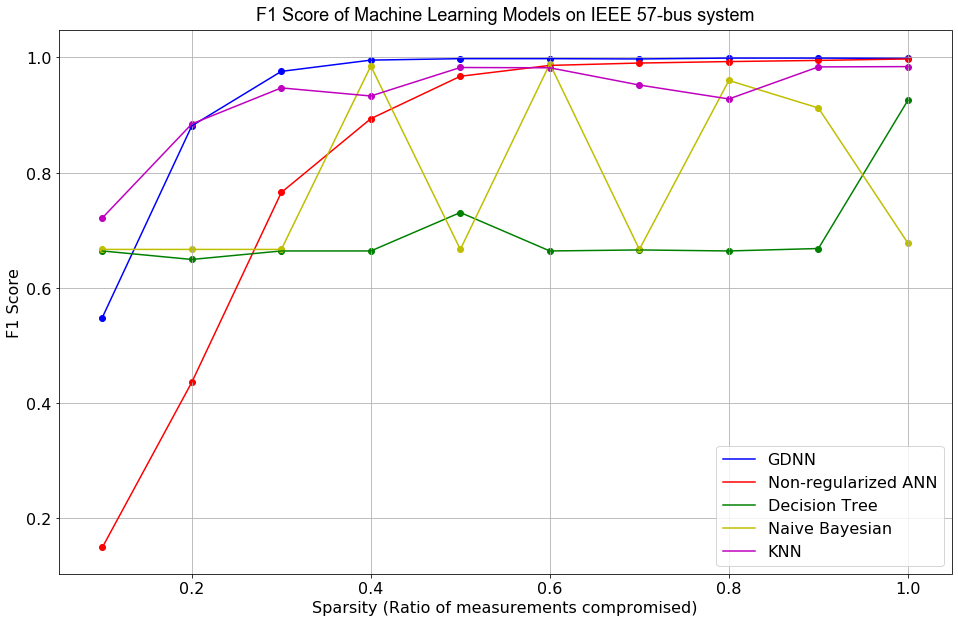

In [8]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_f1, color = 'b')
plt.plot(sparsity,model7_f1, 'b-', label="GDNN")

plt.scatter(sparsity,model1_f1, color = 'r')
plt.plot(sparsity,model1_f1, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_f1, color = 'g')
plt.plot(sparsity,dct_f1, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_f1, color = 'y')
plt.plot(sparsity,gnb_f1, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_f1, color = 'm')
plt.plot(sparsity,knn_f1, 'm-', label="KNN")
plt.ylabel('F1 Score')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('F1 Score of Machine Learning Models on IEEE 57-bus system', **title_font)
plt.grid()

plt.savefig('IEEE57_F1.png')
plt.show()

## Average Results

In [9]:
DGNN_acc = np.mean(model7_accuracy)
DGNN_f1 = np.mean(model7_f1)
ANN_acc = np.mean(model1_accuracy)
ANN_f1 = np.mean(model1_f1)

DCT_acc = np.mean(dct_accuracy)
DCT_f1 = np.mean(dct_f1)
GNB_acc = np.mean(gnb_accuracy)
GNB_f1 = np.mean(gnb_f1)
KNN_acc = np.mean(knn_accuracy)
KNN_f1 = np.mean(knn_f1)

In [10]:
print("DCT accuracy = {}, f1 = {}".format(DCT_acc,DCT_f1))
print("GNB accuracy = {}, f1 = {}".format(GNB_acc,GNB_f1))
print("KNN accuracy = {}, f1 = {}".format(KNN_acc,KNN_f1))

print("ANN accuracy = {}, f1 = {}".format(ANN_acc,ANN_f1))
print("DGNN accuracy = {}, f1 = {}".format(DGNN_acc,DGNN_f1))

DCT accuracy = 0.55445, f1 = 0.6959279847029426
GNB accuracy = 0.6858500000000001, f1 = 0.7855893040112275
KNN accuracy = 0.9359500000000001, f1 = 0.9295376904389665
ANN accuracy = 0.8821000039577485, f1 = 0.8171499472548025
DGNN accuracy = 0.9539499998092651, f1 = 0.9386879075865364


In [11]:
for i in range(2):
    print(i)

0
1


In [12]:
np.arange(0.1,1.0,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])